### **Decorators**

Decorators are functions used to modify other functions, that is allowing the user to add new functionality to an existing object without modifying its structure. 

Let's start from an example of function that has another function as an argument:

In [1]:
def change_sign(f,x):
    return -f(x)

def my_f(x):
    return 7*x

x=3
print(change_sign(my_f,x))

-21


What if the we have more than one argument?

In [2]:
def change_sign(f,*args, **kwargs): #kwargs stands for keyword arguments
    return -f(*args, **kwargs)

def product(x,y):
    return x*y

y=4

print(change_sign(my_f,x))
print(change_sign(product,x,y))

-21
-12


This is a bit ugly though. Let's make the `change_sign` function return a function rather than the output. To do this, we need to create another, wrapping function inside `change_sign`.

In [3]:
def change_sign(f):
    def wrapper(*args, **kwargs):
        return -f(*args, **kwargs)
    return wrapper

minus_my_f = change_sign(my_f)

print(minus_my_f(x))


-21


Now we have a function that will modify any function to output the opposite sign value. However, we probably woudln't want to have to redefine all the functions we might need to use the change sign on. That's where decorator syntax comes in:

In [5]:
def change_sign(func):
    def wrapper(*args, **kwargs):
        return -func(*args, **kwargs)
    return wrapper

@change_sign
def my_f(x):
    return 7*x

@change_sign
def product(x,y):
    return x*y

print(my_f(x))
print(product(x,y))


-21
-12


The only problem we have now concerns the help:

In [6]:
help(my_f)
help(product)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)



We can fix this by using a decorator from the functools package

In [7]:
import functools

def change_sign(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        return -func(*args, **kwargs)
    return wrapper

@change_sign
def my_f(x):
    "hjhjhj"
    return 7*x

@change_sign
def product(x,y):
    return x*y

help(my_f)
help(product)


Help on function my_f in module __main__:

my_f(x)
    hjhjhj

Help on function product in module __main__:

product(x, y)



Here is one very useful example of the use of the decorators:

In [8]:
debug_flag = True

def debug(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        if debug_flag:
            arguments = [f"{a}" for a in args]
            karguments = [f"{k}={v}" for k,v in kwargs.items()]
            name = func.__name__
            print("Calling "+name+" with args: "+", ".join(arguments)+" and kwargs: "+", ".join(karguments))
            value = func(*args, **kwargs)
            print("Run function: "+name+", which output: "+repr(value))
            return value
        else:
            return func(*args, **kwargs)
    return wrapper

@debug
def my_f(x, y=2):
    return 7*x

print(my_f(2,8))

Calling my_f with args: 2, 8 and kwargs: 
Run function: my_f, which output: 14
14


#### Exercise 5.1:

Create a decorator that checks if the passed array is empty and only calls the function if it's not.



In [36]:
import numpy as np

#Decorator that checks if the passed array is empty and only calls the function if it's not
def empty_array(f):
 def wrapper(array):
  if len(array)!=0:
   f(array)
  else:
   print('Empty array')
 return wrapper 

@empty_array
def my_f(array):
 return array+2

array=np.array([])
my_f(array)


Empty array


#### Exercise 5.2:

Create a decorator to time a function execution time. Hint: use `import time` and `time_point=time.time()`. You can check if it's correct by timing the `time.sleep` function.


In [58]:
import time
from datetime import datetime

#Decorator to time a function execution time:
def execution_time(f):
 def wrapper():
  time_point=time.time()
  #print(time_point)
  ts = int(time_point)
  print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
 return wrapper

@execution_time
def my_f(x):
 return time.sleep

my_f()


2026-01-13 16:45:24


/tmp/ipykernel_5775/530118269.py:10: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


#### Exercise 5.3:

Write a decorator that plots a function (of one variable) over the interval (0,100). Make sure your plot has a name, the axis names, nice color, changed background color and a legend.


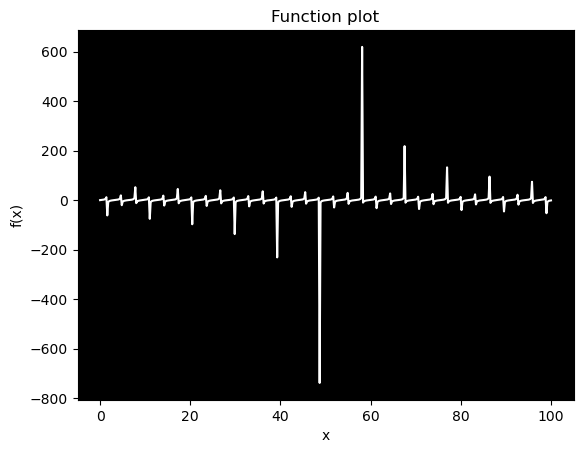

In [28]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

#Decorator that plots a function (of one variable) over the interval (0,100):
def plot_decorator(f):
 def wrapper():
  x=sp.symbols('x')
  func=f(x)
  func1=sp.lambdify(x,func,'numpy')
  x1=np.linspace(0, 100, 500)
  y1=func1(x1)
  plt.plot(x1,y1,'w')
  plt.title('Function plot')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  ax = plt.gca()
  ax.set_facecolor('k')
 return wrapper

@plot_decorator
def my_f(x):
    return 2*sp.tan(x)

my_f()